### Introduction:

Here we are generating data points using damped sine wave. We will be looking at the first 2 periods as we are interested in different regression methods as well as binned regression. The reason why we are looking at the damp sine wave is because it is a decaying wave. As we are analyzing Data for facial age representation, we may see some features whose values are decreasing or increasing with age. Thus using damped sine wave would be a appropriate representation of the decreasing or increasing property of these features.

The expression for damped sine wave is:

$f(t) = A \cdot e^{-\lambda t} \cdot \cos(\omega \cdot t + \phi)$

where A is the initial amplitude of the envelope; $\lambda$ is the decay constant, in the reciprocal of the time units of the X axis; $\omega$ is the angular frequency and $\phi$ is the phase angle at some arbitrary point.

In our case, I arbitrarily chose these values to be the following:

$A = 10$

$\lambda = 0.5$

$\omega = 2 \pi$

$\phi = 0$

Thus the true function that I will be using to generate data is:

$f(t) = 10e^{-10t} cos(2 \pi t)$

At the same time, it is considered that the feature can be monotonically decreasing (or increasing) for certain features, like smoothness of skin. So we will also try simply exponential data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep,splev,UnivariateSpline
%matplotlib inline

In [45]:
t = np.linspace(0,3,200)
f = 10 * np.exp(-0.5 * t) * np.cos(2 * np.pi * t)

In [3]:
t = np.linspace(0,1.5,200)
f = 5 * np.exp(-5 * t)

Now we introduce noise. Noise we will be using is Gaussian noise with $\mu = 0$ and $\sigma^2 = 1$ for the function. The reason why I selected a mean of 0 and variance of 1 is we want the noise to be centered on the pure data point, while the amplitude of the noise will not exceed 10% of the initial amplitude of the function. I then selected a similar noise for $t$, which is a Gaussian noise with 0 mean and 0.01 variance, which also correspond to a $\pm 10\%$ of the value. 

First I took 50 random points on the curve of the function, which are plotted using astroids. These points correspond to the pure data points of the function, and will be the center of each noise cluster. Then for each of these 50 points, I applied said Gaussian noise to its y and t values, and generate 50 noised data point for each point. 

Plot below shows the three kinds of data points. Blue line is the damped sine wave function, black stars are the randomly selected 50 data points and the red dots are the noised data points that I will be using for regression. 

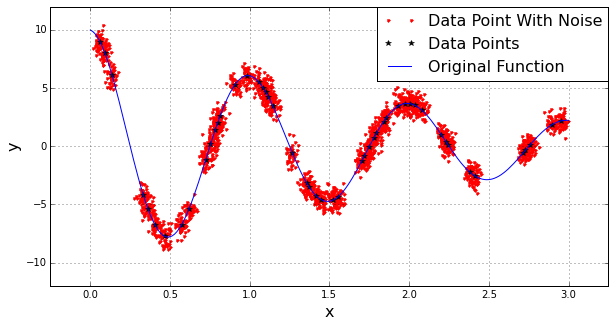

In [47]:
index = np.random.choice(len(t), 50, replace = False)
index = index[np.argsort(index)]

f_sample = f[index]
t_sample = t[index]

f_noise = []
t_noise = np.array([])
for ind in range(len(f_sample)):
    noise_for_f = np.random.normal(0,0.5,50)    
    noise_for_t = np.random.normal(0,0.02,50) 
    f_noise = np.concatenate([f_noise, noise_for_f+f_sample[ind]])
    t_noise = np.concatenate([t_noise, noise_for_t+t_sample[ind]])

plt.figure(figsize=(10, 5))
plt.plot(t_noise,f_noise,'r.')
plt.plot(t_sample, f_sample, 'k*')
plt.plot(t,f)
plt.legend(['Data Point With Noise', 'Data Points','Original Function'],
           bbox_to_anchor=(1, 1), loc=0, borderaxespad=0., fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim((-0.25,3.25))
plt.ylim((-12,12))
plt.grid()
plt.show()

Now I will start using regressions on the noised data points and test their performance. The regression methods I will be using are: Linear Regression, Polynomial Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Decision Tree Regression, Adaboost Regression. 

### Regression Methods
#### Linear regression
Linear regression is the well-known modeling technique. It depicts the linear relationship between independent variable, which is t in my case, and dependent variable, f. It uses the best fit straight line to show the relationship between them. 

Linear regression has a form of $f = k \times t + b \>( + e)$, where $k$ is the slope, $b$ is the intercept and $e$ is the error term. This equation can be used to predict the value of target variable based on given predictor variable(s). In the linear regression problem, we will be 'learning' parameters $b$ and $k$ from data.

Linear regression can be expanded to multiple linear regression when there's more than one independent variables. In the apparent age detection data, which we will talk about later, there are more than one independent variable. It essentially still work the same way, with instead of a line in 2D, it would be a line in a higher dimension.

#### Polynimial Regression
Polynomial regression is used if the power of independent variable is more than 1. It has a form of:

$f = a_0 + a_1 \times t + a_2 \times t^2 + ...$

Polynimial Regression is very similar to linear regression in terms of composition: a constant term representing the intercept and a sum of a series of polynomial terms. And the goal of the regression is to learn the parameter(s). 

The different between a polynimial regression and linear regression is that polynomial represent a curve or a curved surface while linear regression represent a striaght line. 

#### Ridge Regression
Ridge Regression is used when the independent variables are highly correlated, which is called multicollinearity. In regression, error is usually due to 2 different components: bias and variance. Bias represent the error caused by model not fitting data well - usualy overly simplistic model, while variance is caused by model fitting training data 'too well' and perform poorly on testing data - usually correspond to overly complex model. Ridge regression tackles multicollinearity problem by adding a penalty term to the end of loss function, multiplied by a shrinkage parameter $\lambda$. Thus the formulation would be:

$\hat{\beta} =argmin\> ||\>y - \textbf{X} \beta \>||_2^2 + \lambda \> ||\> \beta \>||_2^2$

Here we not only want to minimize the error between model prediction, which is expressed through the least square term, but also want to minimize the complexity of the model, which is expressed through the $l_2$ regularization of the model.

#### Lasso Regression
Lasso regression is similar to Ridge regression in the sense that it also punishes complex models, which gives it a very similar formulation as Ridge regression:

$\hat{\beta} =argmin\> ||\>y - \textbf{X} \beta \>||_2^2 + \lambda \> ||\> \beta \>||_2$

It's different from Ridge regression as it uses the absolute value of coefficient parameters instead of squares. As Ridge regression can not set coefficients to zero, so it either select all the coefficients or none of them. Lasso is capable of performing both parameter shrinkage and variable selection automatically, because it will set coefficients of collinear variables to 0. 

#### ElasticNet Regression
ElasticNet regression is a hybrid of Ridge regression and Lasso regression. It is a model with both $l_1$ and $l_2$ regularization terms. It has a form of:

$\hat{\beta} =argmin\> ||\>y - \textbf{X} \beta \>||_2^2 + \lambda_1 \> ||\> \beta \>||_2 + \lambda_2 \> ||\> \beta \>||_2^2 $

Compared to Ridge and Lasso, ElasticNet works well when there are multiple features that are correlated: Lasso is likely to pick one randomly, while ElasticNet is likely to pick both.  

#### Random Forest Regression
Decision trees are non-parametric supervised learning method that is commonly used for classification and regression problems. Decision trees method aims to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision trees is susceptible to overfitting and is affected by outliers and noisy data. 

Random Forest regress is an ensemble learning method that uses a collection of decision trees models. It uses a collection of decision trees on different sub-samples of the dataset and use averaging to imporve the prediction accuracy as well as reduct overfitting. 

The down side of this method is it will not generate an explicit mathematical model as regression method listed above. However, non-parametric regression models require fewer assumptions about the data, and consequently will prove better in situations where the true distribution is unknown or cannot be easily approximated using a probability distribution. Although in this case our data come from a specific probability model, the apparent age detection data we will use is the output of a neural network layer, which is highly likely not to come from a deterministic probability model. In this case, non-parametric model would be a better candidate. 

#### Adaboost Regression
Adaboost regression is the other kind of ensemble method. It uses an ensemble of weak learners whose performance is slightly better than chance and produce a prediction model that converge to a strong learner. It is less susceptible to overfitting, however, it is sensitive to outliers and noisy data. As a 'out-of-the-box' method, not too much explanation will be spent on this method. 

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

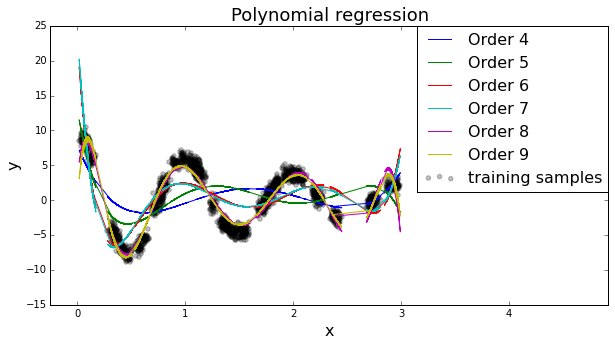

In [59]:
plt.figure(figsize=(10, 5))
plt.scatter(t_noise, f_noise, c="k", label="training samples",alpha=0.25)
for d in [4,5,6,7,8,9]:
    z = np.polyfit(np.array(t_noise), np.array(f_noise), d)
    p = np.poly1d(z)
    plt.plot(t_noise, p(t_noise),label = 'Order '+str(d))
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('Polynomial regression', fontsize=18)
plt.xlim((-0.25,4.9252))
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0., fontsize=16)
plt.show()

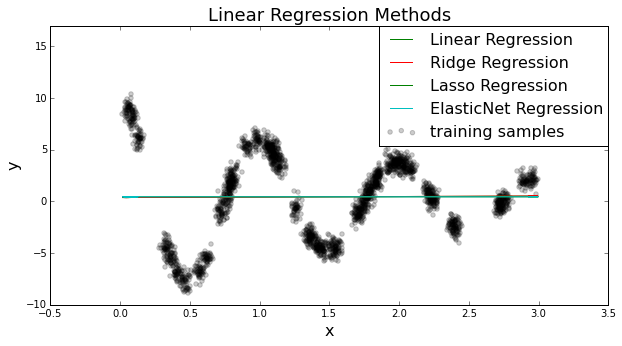

In [61]:
t_noise = t_noise.reshape((len(t_noise),1))
f_noise = f_noise.reshape((len(f_noise),1)).ravel()

regr_4 = LinearRegression()
regr_5 = Ridge(alpha=0.1)
regr_6 = Lasso(alpha=0.1)
regr_7 = ElasticNet(alpha=0.1, l1_ratio=0.5)

regr_4.fit(t_noise, f_noise)
regr_5.fit(t_noise, f_noise)
regr_6.fit(t_noise, f_noise)
regr_7.fit(t_noise, f_noise)

# Predict
f_4 = regr_4.predict(t_noise)
f_5 = regr_5.predict(t_noise)
f_6 = regr_6.predict(t_noise)
f_7 = regr_7.predict(t_noise)

plt.figure(figsize=(10, 5))
plt.scatter(t_noise, f_noise, c="k", label="training samples",alpha=0.2)
plt.plot(t_noise, f_4, c="g", label="Linear Regression", linewidth=1)
plt.plot(t_noise, f_5, c="r", label="Ridge Regression", linewidth=1)
plt.plot(t_noise, f_6, c="g", label="Lasso Regression", linewidth=1)
plt.plot(t_noise, f_7, c="c", label="ElasticNet Regression", linewidth=1)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("Linear Regression Methods", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0., fontsize=16)
plt.ylim((-10,17))
plt.show()

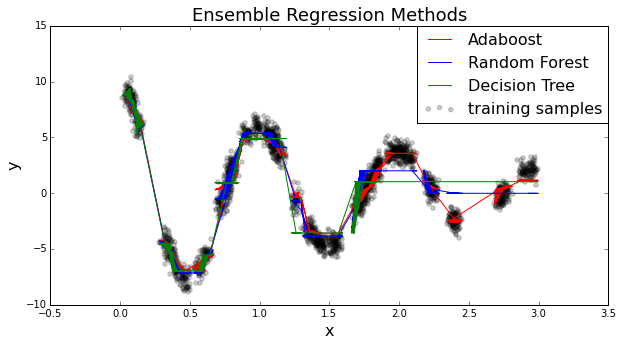

In [62]:
t_noise = t_noise.reshape((len(t_noise),1))
f_noise = f_noise.reshape((len(f_noise),1)).ravel()

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
regr_3 = RandomForestRegressor(n_estimators=25, criterion='mse', max_depth=5)

regr_1.fit(t_noise, f_noise)
regr_2.fit(t_noise, f_noise)
regr_3.fit(t_noise, f_noise)

# Predict
f_1 = regr_1.predict(t_noise)
f_2 = regr_2.predict(t_noise)
f_3 = regr_3.predict(t_noise)

plt.figure(figsize=(10, 5))
plt.scatter(t_noise, f_noise, c="k", label="training samples",alpha=0.2)

plt.plot(t_noise, f_2, c="r", label="Adaboost", linewidth=1)
plt.plot(t_noise, f_3, c="b", label="Random Forest", linewidth=1)
plt.plot(t_noise, f_1, c="g", label="Decision Tree", linewidth=1)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("Ensemble Regression Methods", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=16)
plt.show()

### Performance analysis
The next problem will be how to determine the goodness of fit of the regression model, which will be assessed using the following metrics:

1. Mean Square Error(MSE)
MSE is a common metric to measure the distance between estimated value and true values. 
2. Cross Entropy Loss
3. Kullback–Leibler divergence

At the same time, model will also be evaluated on its performance with noisy data and presence of outliers. It is important that when data is noisy or there are outliers present the model is able to perform well. 

Since the noise data used above is contaminated with Gaussian noise, I will not perform a separate test for performance with noisy data. I will duplicate this data set and add outliers to create a test set for performance with ourliers present.